In [1]:
import numpy as np
import matplotlib.pyplot as plt
from galpy.orbit import Orbit
import pandas as pd

In [2]:
#Load Data

do_47tuc=True #Can set to False or True depending on if you want to run the 47Tuc dataset or the keanue dataset

if do_47tuc: 
    dist=4.5 #kpc
    Mv=-9.42
    ra,dec,pmra,pmdec=np.loadtxt('47tuc.dat',unpack=True,skiprows=1)
else:
    #Keanu
    dist=50.0 #kpc
    Mv=-12.8
    ra,dec,pmra,pmdec=np.loadtxt('keanu.csv',unpack=True,skiprows=1)
    df=pd.read_csv('47tuc.csv')



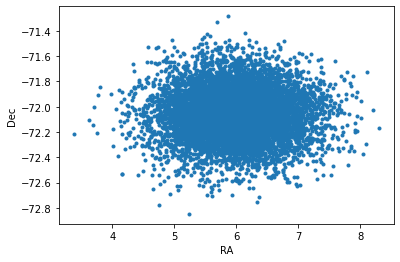

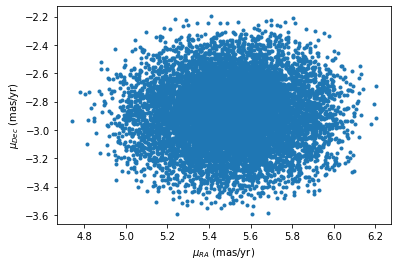

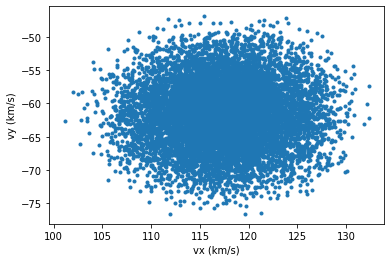

In [3]:
#(i)
plt.plot(ra,dec,'.')
plt.xlabel('RA')
plt.ylabel('Dec')

plt.show()
plt.close()

plt.plot(pmra,pmdec,'.')
plt.xlabel(r'$\mu_{RA}$ (mas/yr)')
plt.ylabel(r'$\mu_{Dec}$ (mas/yr)')
plt.show()
plt.close()

#Convert velocities to km/s
vx=pmra*dist*4.74 #km/s
vy=pmdec*dist*4.74 #km/s

plt.plot(vx,vy,'.')
plt.xlabel('vx (km/s)')
plt.ylabel('vy (km/s)')
plt.show()
plt.close()

In [4]:
#(ii) Randomly sample the dataset
np.random.seed(123)
random_star_ids=np.random.randint(low=0,high=len(ra),size=100)
ra_sample=ra[random_star_ids]
dec_sample=dec[random_star_ids]
pmra_sample=pmra[random_star_ids]
pmdec_sample=pmdec[random_star_ids]

#Save as a cv so you can read in as a pandas datastructure
np.savetxt('sample.csv',np.column_stack([ra_sample,dec_sample,pmra_sample,dec_sample]),delimiter=',',header='ra,dec,pmra,pmdec',comments='')

In [5]:
#(ii) a
print(ra_sample[:10])
print(dec_sample[:10])
print(pmra_sample[:10])
print(pmdec_sample[:10])

[6.82558985 5.87803351 6.37013527 5.56225868 6.20582501 5.88153518
 5.96252673 5.38571909 7.03120505 5.4195499 ]
[-71.99509327 -72.00401459 -72.02213307 -71.97283721 -71.8736502
 -72.02291389 -71.82270984 -71.80150197 -71.75194668 -72.47608072]
[5.75493595 6.12223077 5.30401415 5.28283275 5.35002511 5.20043827
 5.57545534 5.46690122 5.39908845 5.64373476]
[-2.73565383 -3.0519771  -3.12510331 -3.08438425 -2.66332445 -2.9518418
 -3.0440963  -3.19769051 -2.87967954 -2.89371507]


In [6]:
df=pd.read_csv('sample.csv')
df

,ra,dec,pmra,pmdec
0,6.825590,-71.995093,5.754936,-71.995093
1,5.878034,-72.004015,6.122231,-72.004015
2,6.370135,-72.022133,5.304014,-72.022133
3,5.562259,-71.972837,5.282833,-71.972837
4,6.205825,-71.873650,5.350025,-71.873650
...,...,...,...,...
95,5.696850,-71.932318,5.278824,-71.932318
96,6.259955,-72.236259,6.086693,-72.236259
97,5.907823,-72.067735,5.869581,-72.067735
98,5.655904,-72.214239,5.166715,-72.214239


In [7]:
#(ii) b

def number_summary(x):
    print('MEAN = ',np.mean(x))
    
    xsort=np.sort(x)
    
    print('FIRST QUARTER :',xsort[int(len(x)/4)])
    print('THIRD QUARTER :',xsort[int(3.*len(x)/4)])

    #Two ways of getting min/max
    print('MIN :',np.amin(x),xsort[0])
    print('MAX :',np.amax(x),xsort[-1])
                          

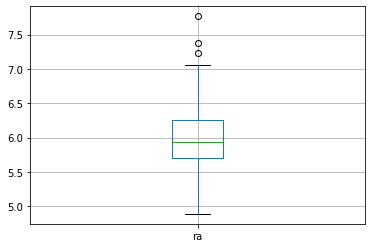

MEAN =  6.003364877180727
FIRST QUARTER : 5.707836116593054
THIRD QUARTER : 6.271926179235301
MIN : 4.88757729215057 4.88757729215057
MAX : 7.767897767078205 7.767897767078205


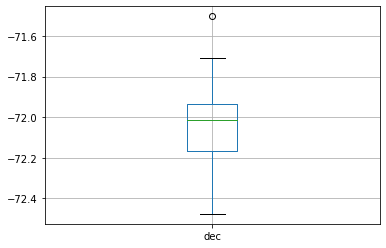

MEAN =  -72.03814537165849
FIRST QUARTER : -72.16297251046973
THIRD QUARTER : -71.93231844271985
MIN : -72.47608072234897 -72.47608072234897
MAX : -71.50343893022507 -71.50343893022507


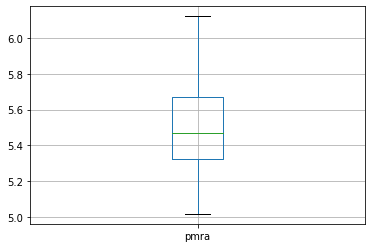

MEAN =  5.511766086536867
FIRST QUARTER : 5.322765464844543
THIRD QUARTER : 5.670908727183614
MIN : 5.016100399873209 5.016100399873209
MAX : 6.122230771294662 6.122230771294662


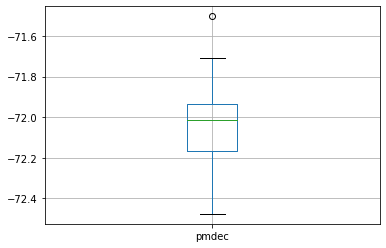

MEAN =  -2.8362110233664692
FIRST QUARTER : -2.9649289239961165
THIRD QUARTER : -2.6827236161280053
MIN : -3.4066349818700705 -3.4066349818700705
MAX : -2.3076538718995985 -2.3076538718995985


In [8]:
boxplot = df.boxplot(column=['ra'],return_type='both')
plt.show()
plt.close()
number_summary(ra_sample)


boxplot = df.boxplot(column=['dec'])
plt.show()
plt.close()
number_summary(dec_sample)


boxplot = df.boxplot(column=['pmra'])
plt.show()
plt.close()
number_summary(pmra_sample)


boxplot = df.boxplot(column=['pmdec'])
plt.show()
plt.close()
number_summary(pmdec_sample)



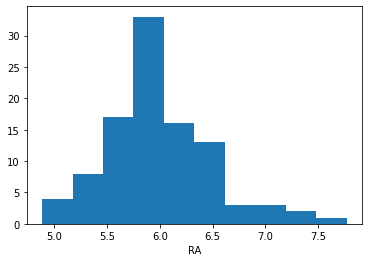

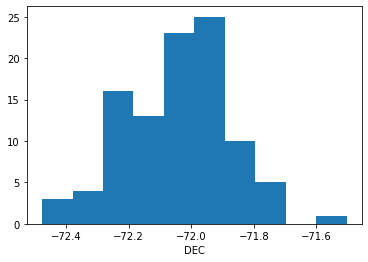

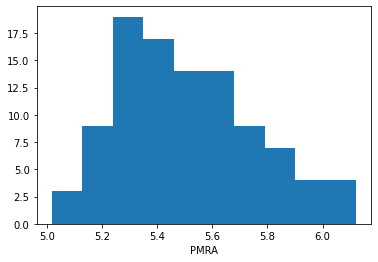

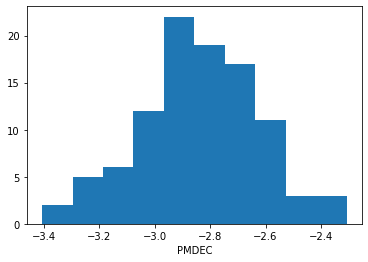

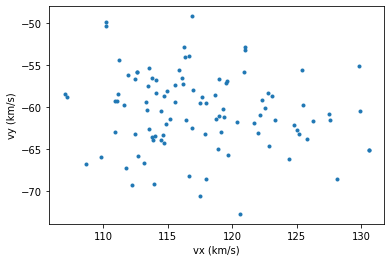

In [9]:
#(ii) c

plt.hist(ra_sample)
plt.xlabel('RA')
plt.show()
plt.close()

plt.hist(dec_sample)
plt.xlabel('DEC')
plt.show()
plt.close()

plt.hist(pmra_sample)
plt.xlabel('PMRA')
plt.show()
plt.close()

plt.hist(pmdec_sample)
plt.xlabel('PMDEC')
plt.show()
plt.close()

#Convert velocities to km/s
vx_sample=pmra_sample*dist*4.74 #km/s
vy_sample=pmdec_sample*dist*4.74 #km/s

plt.plot(vx_sample,vy_sample,'.')
plt.xlabel('vx (km/s)')
plt.ylabel('vy (km/s)')
plt.show()
plt.close()

(ii) d - Boxplots reveal macroscopic properties of the distribution, but fail to show you the finer details of the distribution (e.g. centrally peaked, long tails)

In [10]:
# (ii)e Find centre through the mean of each coordinate. This assumption is valid since the density profiles of globular
#clusters are peaked at the cluster centre. A more accurate approach would be to find the centre of density

ragc_sample=np.mean(ra_sample)
decgc_sample=np.mean(dec_sample)
pmragc_sample=np.mean(pmra_sample)
pmdecgc_sample=np.mean(pmdec_sample)

print(ragc_sample,decgc_sample,pmragc_sample,pmdecgc_sample)


6.003364877180727 -72.03814537165849 5.511766086536867 -2.8362110233664692


In [11]:
#(ii) f
import scipy.stats as st

#create 90% confidence interval for population mean weight
interval=st.t.interval(alpha=0.90, df=len(ra_sample)-1, loc=np.mean(ra_sample), scale=st.sem(ra_sample)) 
print(interval)
interval=st.t.interval(alpha=0.90, df=len(dec_sample)-1, loc=np.mean(dec_sample), scale=st.sem(dec_sample)) 
print(interval)
interval=st.t.interval(alpha=0.90, df=len(pmra_sample)-1, loc=np.mean(pmra_sample), scale=st.sem(pmra_sample)) 
print(interval)
interval=st.t.interval(alpha=0.90, df=len(pmdec_sample)-1, loc=np.mean(pmdec_sample), scale=st.sem(pmdec_sample)) 
print(interval)

#90% confidence that the true mean is within the ranges printed


(5.92005296330899, 6.086676791052463)
(-72.066087175608, -72.01020356770897)
(5.469267166664179, 5.554265006409556)
(-2.8716058140485003, -2.800816232684438)


In [12]:
# (iii) Find centre through the mean of each coordinate. This assumption is valid since the density profiles of globular
#clusters are peaked at the cluster centre. A more accurate approach would be to find the centre of density

ragc=np.mean(ra)
decgc=np.mean(dec)
pmragc=np.mean(pmra)
pmdecgc=np.mean(pmdec)

print(ragc,decgc,pmragc,pmdecgc)

5.981008473710406 -72.05640313363646 5.503765800275704 -2.884934156255486


In [13]:
#In the case of 47 Tuc, Vasiliev 2019 finds the centre to be located at:
ragc_v19 = 6.024
decgc_v19 = -72.081 
pmra_v19 = 5.237 
pmdec_v19 = -2.524


In [14]:
def percent_difference(observed,expected):
    pdiff=100.0*(observed-expected)/expected
    return pdiff

In [15]:
#Find percent difference between Vasiliev and my calculations for 47 Tuc
if do_47tuc:
    print('RA: ',percent_difference(ragc,ragc_v19),' %')
    print('Dec: ',percent_difference(decgc,decgc_v19),' %')
    print('pmra: ',percent_difference(pmragc,pmra_v19),' %')
    print('pmdec: ',percent_difference(pmdecgc,pmdec_v19),' %')

#Position of centre of very close, less than 1% difference
#Velocity of centre of mass showing larger percent difference, less than 15%

RA:  -0.7136707551393411  %
Dec:  -0.034123924978202415  %
pmra:  5.093866722850942  %
pmdec:  14.300085430090578  %


In [16]:
#Find each stars angular offset from centre
dra = (ra-ragc) * np.cos(np.radians(decgc))
ddec = (dec-decgc)
drad=np.sqrt(dra**2.+ddec**2.)
#Convert dr from degrees to pc
dr=dist*1000.0*np.tan(np.radians(drad))

#Convert velocities to km/s
vx=pmra*dist*4.74 #km/s
vy=pmdec*dist*4.74 #km/s

#Convert velocity of centre to km/s
vxgc=pmragc*dist*4.74 #km/s
vygc=pmdecgc*dist*4.74 #km/s

#Find velocity offset of each star from centre
dvx=vx-vxgc
dvy=vy-vygc
dv=np.sqrt(dvx**2.+dvy**2.)

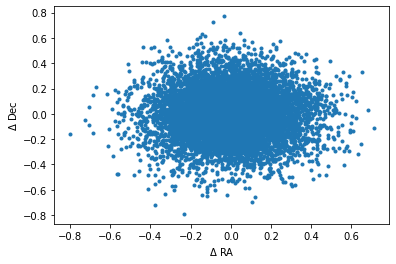

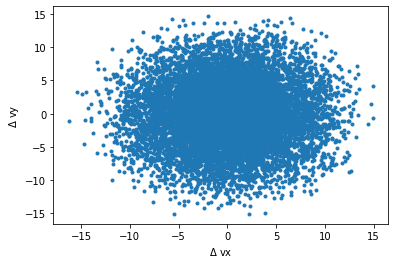

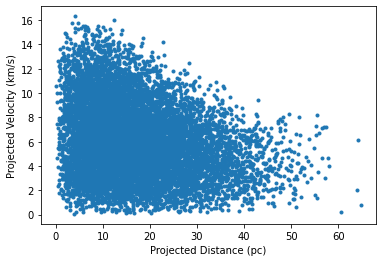

In [17]:
plt.plot(dra,ddec,'.')
plt.xlabel(r'$\Delta$ RA')
plt.ylabel(r'$\Delta$ Dec')
plt.show()
plt.close()

plt.plot(dvx,dvy,'.')
plt.xlabel(r'$\Delta$ vx')
plt.ylabel(r'$\Delta$ vy')
plt.show()
plt.close()

plt.plot(dr,dv,'.')
plt.xlabel('Projected Distance (pc)')
plt.ylabel('Projected Velocity (km/s)')
plt.show()
plt.close()

In [18]:
#Set 1D velocity dispersion equal to the mean of the x and y velocity dispersion since clusters are isotropic
sigvx=np.std(dvx)
sigvy=np.std(dvy)
sig1d=(sigvx+sigvy)/2.

#Assuming the cluster is isotropic, the mean velocity can be written as root(3)*sig1d
meanv=np.sqrt(3.)*sig1d
#Take the size of the system to be the maximum projected distance. (also would except radius that encloses have the stars)
#Since systems are spherically symmetric, projection is most important when viewing near the centre of the cluster,
#however as you go to the projected outskirts it becomes more and more likely that the stars line-of-sight distance
#equals that of the system itself.
r=np.amax(dr)
print(sigvx,sigvy,meanv,r)

4.847999165365031 4.9414675968468655 8.477926905578899 64.74297820494857


In [19]:
#Find mass
mass=r*(meanv**2.)/(4.302e-3)
print(mass)

1081686.9817924122


In [20]:
#Find luminosity given the systems absolute visual magnitude and noting the absolute visual magnitude of the sun is 4.83
lum=10.0**((Mv-4.83)/-2.5)
print(lum)

501187.2336272725


In [21]:
#Calculate the M/L ratio
#For systems with M/L less than about 4 or 5, the system is almost purely stellar. For systems with M/L ratios greater 
#between 5-100 there is likely a significant dark matter component.
mlrat=mass/lum
print(mlrat)

2.158249271362828


In [22]:
143.37439832722075/4.

35.84359958180519

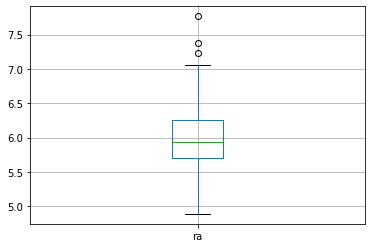

In [23]:
boxplot = df.boxplot(column=['ra'])

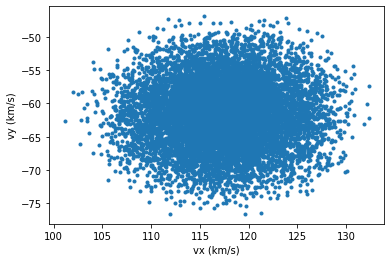

In [24]:
#Convert velocities to km/s
vx=pmra*dist*4.74 #km/s
vy=pmdec*dist*4.74 #km/s

plt.plot(vx,vy,'.')
plt.xlabel('vx (km/s)')
plt.ylabel('vy (km/s)')
plt.show()
plt.close()

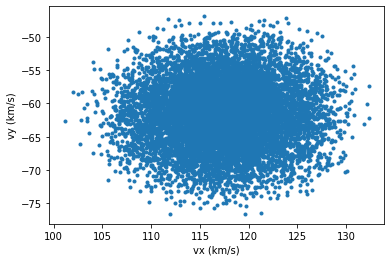

In [25]:
#Convert velocities to km/s
vx=pmra*dist*4.74 #km/s
vy=pmdec*dist*4.74 #km/s

plt.plot(vx,vy,'.')
plt.xlabel('vx (km/s)')
plt.ylabel('vy (km/s)')
plt.show()
plt.close()

In [26]:
#Convert velocity of centre to km/s
vxgc=pmragc*dist*4.74 #km/s
vygc=pmdecgc*dist*4.74 #km/s